In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 24 February 2025

# Data Source : https://pxdata.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__ton/statfin_ton_pxt_13pm.px/
# https://pxdata.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__vaerak/statfin_vaerak_pxt_11s5.px/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

cwd = os.getcwd() 
env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')

print("Current working directory:", cwd) 

if(env_name == "Localhost"):
    data_files = ["Personal_Injuries_With_Population.csv", "Road_Traffic_Accidents_Personal_Injuries.csv"]
else: 
    data_files = [
                "/kaggle/input/personal-injuries-with-population/Personal_Injuries_With_Population.csv",
                "/kaggle/input/road-traffic-accidents-personal-injuries/Road_Traffic_Accidents_Personal_Injuries.csv",
                 ]


df = pd.read_csv(data_files[0])
df.head(2)

Current working directory: /home/ahmad/Desktop/ML_Lab/Finland_stat


,Year,Area,Personal_Injury_Traffic,Population
0,2003,WHOLE COUNTRY,6907,5219732
1,2003,MK01 Uusimaa,1598,1429869


<BarContainer object of 20 artists>

<BarContainer object of 20 artists>

Text(0.5, 0, 'Average Count')

Text(0.5, 1.0, 'Ratio, Injuries, and Population by Area')

[]

[]

Text(-0.01, 0, 'WHOLE COUNTRY')

Text(-0.01, 1, 'MK21 Åland')

Text(-0.01, 2, 'MK19 Lapland')

Text(-0.01, 3, 'MK18 Kainuu')

Text(-0.01, 4, 'MK17 North Ostrobothnia')

Text(-0.01, 5, 'MK16 Central Ostrobothnia')

Text(-0.01, 6, 'MK15 Ostrobothnia')

Text(-0.01, 7, 'MK14 South Ostrobothnia')

Text(-0.01, 8, 'MK13 Central Finland')

Text(-0.01, 9, 'MK12 North Karelia')

Text(-0.01, 10, 'MK11 North Savo')

Text(-0.01, 11, 'MK10 South Savo')

Text(-0.01, 12, 'MK09 South Karelia')

Text(-0.01, 13, 'MK08 Kymenlaakso')

Text(-0.01, 14, 'MK07 Päijät-Häme')

Text(-0.01, 15, 'MK06 Pirkanmaa')

Text(-0.01, 16, 'MK05 Kanta-Häme')

Text(-0.01, 17, 'MK04 Satakunta')

Text(-0.01, 18, 'MK02 Southwest Finland')

Text(-0.01, 19, 'MK01 Uusimaa')

/tmp/ipykernel_371267/2280354958.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([f'{x/1e6:.0f}' for x in ax1.get_xticks()])


[Text(0.0, 0, '0'),
 Text(1000.0, 0, '0'),
 Text(2000.0, 0, '0'),
 Text(3000.0, 0, '0'),
 Text(4000.0, 0, '0'),
 Text(5000.0, 0, '0'),
 Text(6000.0, 0, '0')]

Text(0.5, 0, 'Average Count')

Text(0.95, 0.9, 'Population scaled by 1000.0')

Text(0.95, 0.85, 'Ratio scaled by 100000.0')

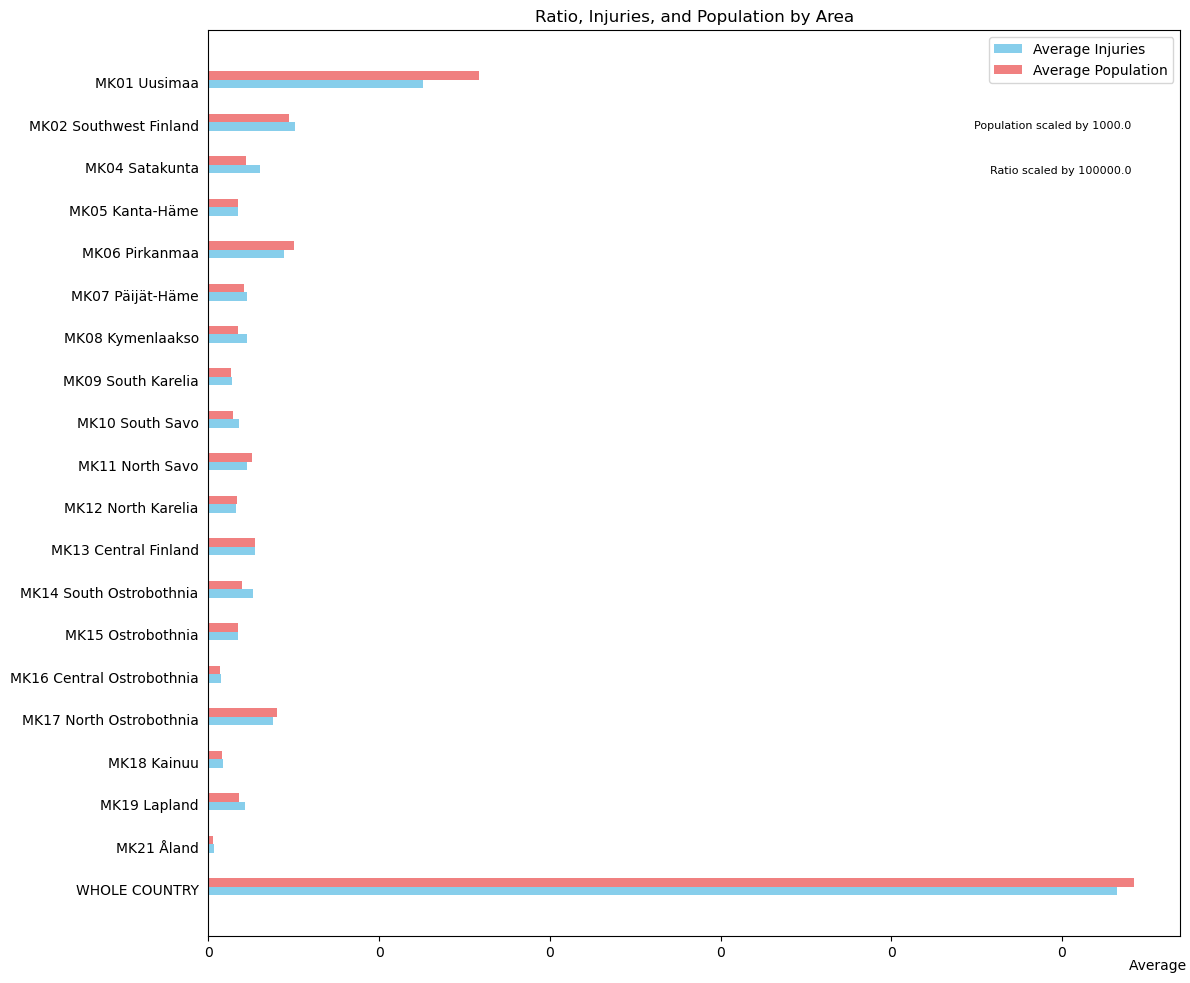

In [4]:

# Load the data and calculate area_data
area_data = df.groupby('Area').agg({'Personal_Injury_Traffic': 'mean', 'Population': 'mean'})
area_data['Ratio'] = area_data['Personal_Injury_Traffic'] / area_data['Population']

# --- 3-Bar Style Horizontal Bar Chart with Reversed Order and Ratio First ---
fig, ax1 = plt.subplots(figsize=(12, 10))
width = 0.2

# Reverse the order of area_data
area_data = area_data[::-1]  # Reverse DataFrame rows

y_indexes = np.arange(len(area_data.index))

scaling_factor_ratio = 1e5
scaling_factor_population = 1e3

# Corrected bar plotting and offsets (Ratio, Injuries, Population order):
ax1.barh(y_indexes, area_data['Personal_Injury_Traffic'], height=width, label='Average Injuries', color='skyblue')
ax1.barh(y_indexes + width, area_data['Population'] / scaling_factor_population, height=width, label='Average Population', color='lightcoral')

ax1.set_xlabel('Average Count')
ax1.set_title('Ratio, Injuries, and Population by Area') # Changed Title

# Remove y-axis ticks and labels
ax1.set_yticks([])
ax1.set_yticklabels([])

# Add Area labels manually
for i, area in enumerate(area_data.index):
    ax1.text(-0.01, y_indexes[i], area, va='center', ha='right', transform=ax1.get_yaxis_transform())

ax1.legend(loc='upper right')

fig.tight_layout()

# Adjust x-axis to show count in millions
ax1.set_xticklabels([f'{x/1e6:.0f}' for x in ax1.get_xticks()])
ax1.set_xlabel('Average Count', position=(1, 0))
ax1.xaxis.set_label_coords(1, -0.025)

# Add annotations for scaling
ax1.text(0.95, 0.9, f'Population scaled by {scaling_factor_population}', transform=ax1.transAxes, ha='right', va='top', fontsize=8)
ax1.text(0.95, 0.85, f'Ratio scaled by {scaling_factor_ratio}', transform=ax1.transAxes, ha='right', va='top', fontsize=8)

plt.show()

<Figure size 1200x600 with 0 Axes>

<BarContainer object of 20 artists>

Text(0.5, 0, 'Area (Region)')

Text(0, 0.5, 'Injury/Population Ratio')

Text(0.5, 1.0, 'Injury/Population Ratio by Area (Sorted)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'MK04 Satakunta'),
  Text(1, 0, 'MK14 South Ostrobothnia'),
  Text(2, 0, 'MK08 Kymenlaakso'),
  Text(3, 0, 'MK10 South Savo'),
  Text(4, 0, 'MK19 Lapland'),
  Text(5, 0, 'MK18 Kainuu'),
  Text(6, 0, 'MK16 Central Ostrobothnia'),
  Text(7, 0, 'MK07 Päijät-Häme'),
  Text(8, 0, 'MK21 Åland'),
  Text(9, 0, 'MK02 Southwest Finland'),
  Text(10, 0, 'MK09 South Karelia'),
  Text(11, 0, 'MK15 Ostrobothnia'),
  Text(12, 0, 'MK13 Central Finland'),
  Text(13, 0, 'MK05 Kanta-Häme'),
  Text(14, 0, 'WHOLE COUNTRY'),
  Text(15, 0, 'MK12 North Karelia'),
  Text(16, 0, 'MK17 North Ostrobothnia'),
  Text(17, 0, 'MK11 North Savo'),
  Text(18, 0, 'MK06 Pirkanmaa'),
  Text(19, 0, 'MK01 Uusimaa')])

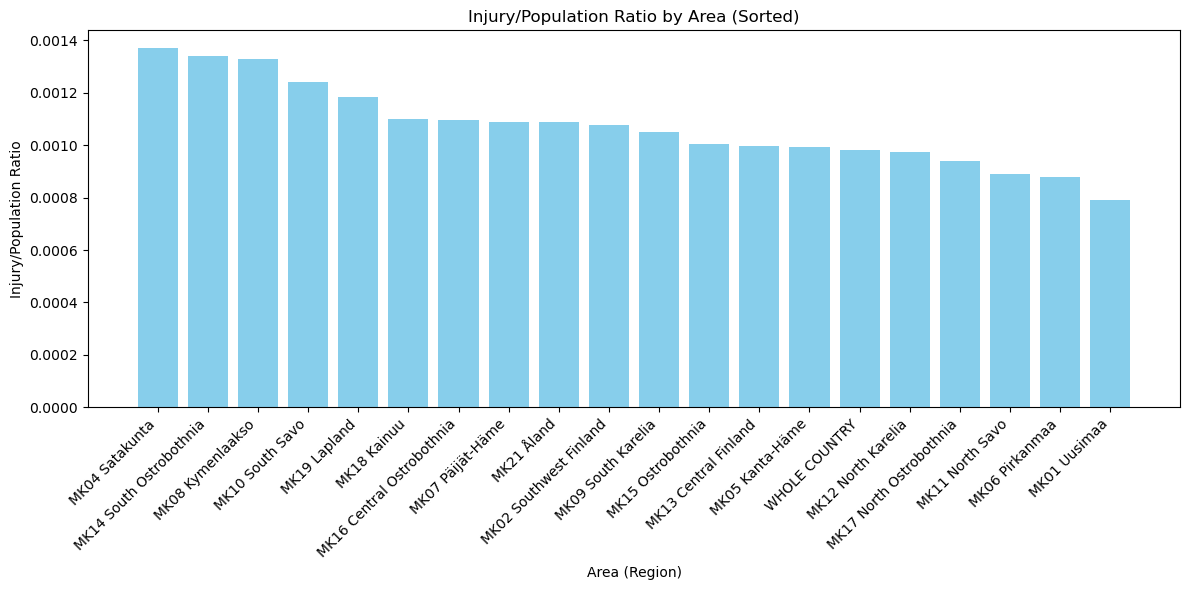

In [17]:
# --- Plotting the Ratio ---
area_data_sorted = area_data.sort_values(by='Ratio', ascending=False)

plt.figure(figsize=(12, 6))

# Get the sorted data for plotting
x = area_data_sorted.index  # Areas (regions)
y = area_data_sorted['Ratio']

plt.bar(x, y, color='skyblue')  # Use bar chart for the ratio

plt.xlabel('Area (Region)')
plt.ylabel('Injury/Population Ratio')
plt.title('Injury/Population Ratio by Area (Sorted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Average Population')

Text(0, 0.5, 'Average Injuries')

Text(0.5, 1.0, 'Scatter Plot of Population vs. Injuries (Colored by Ratio)')

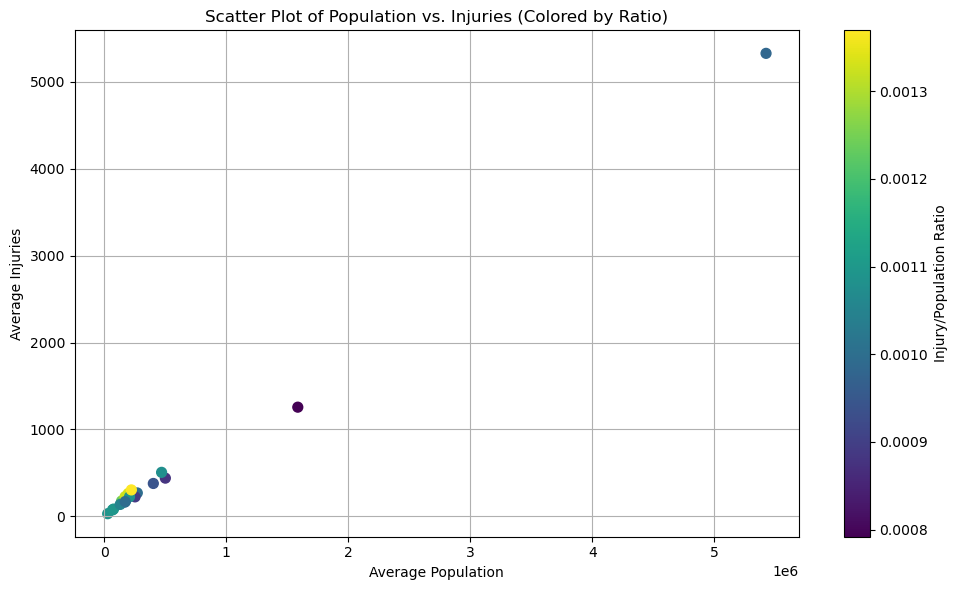

In [13]:
# --- Optional: Plotting Injuries vs. Population (with Ratio as color) ---
plt.figure(figsize=(10, 6))
plt.scatter(area_data['Population'], area_data['Personal_Injury_Traffic'], c=area_data['Ratio'], cmap='viridis', s=50)
plt.xlabel('Average Population')
plt.ylabel('Average Injuries')
plt.title('Scatter Plot of Population vs. Injuries (Colored by Ratio)')
plt.colorbar(label='Injury/Population Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0, 10, 'WHOLE COUNTRY')

Text(0, 10, 'MK21 Åland')

Text(0, 10, 'MK19 Lapland')

Text(0.5, 0, 'Average Population')

Text(0, 0.5, 'Injury/Population Ratio')

Text(0.5, 1.0, 'Scatter Plot of Population vs. Injury/Population Ratio (Colored by Ratio)')

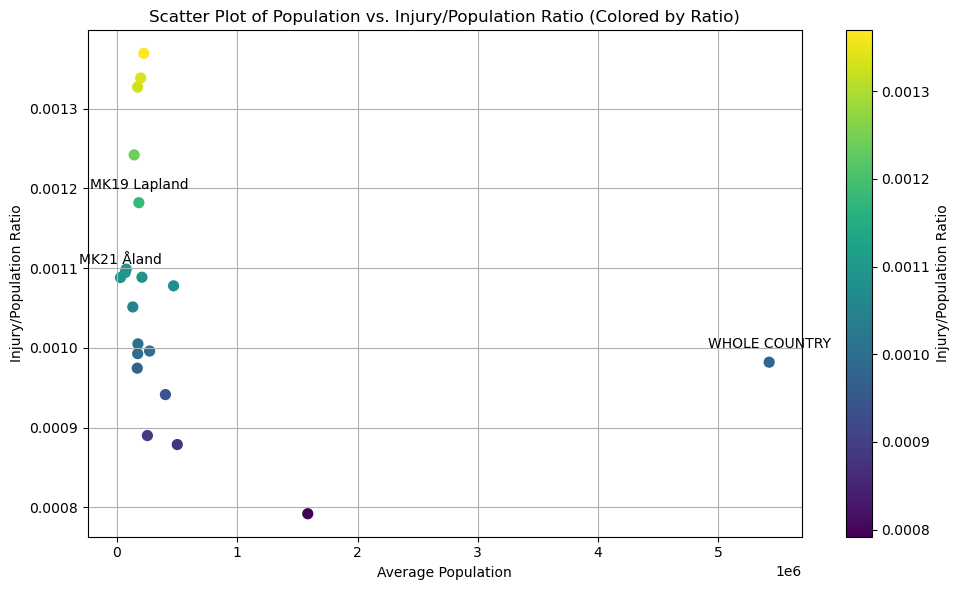

In [11]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(area_data['Population'], area_data['Ratio'], c=area_data['Ratio'], cmap='viridis', s=50)

# Label the first n areas (or all areas if you prefer)
n = 3  # Number of areas to label (adjust as needed)

for i, area in enumerate(area_data.index[:n]):  # Label the first n areas
    x = area_data['Population'][area]
    y = area_data['Ratio'][area]
    plt.annotate(area, (x, y), textcoords="offset points", xytext=(0,10), ha='center')  # Adjust offset as needed

# OR, if you want to label ALL points (use with caution - can be cluttered):
# for area in area_data.index:  # Label ALL areas
#     x = area_data['Population'][area]
#      y = area_data['Ratio'][area]
#     plt.annotate(area, (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8) # Smaller font


plt.xlabel('Average Population')
plt.ylabel('Injury/Population Ratio')  # Corrected y-axis label
plt.title('Scatter Plot of Population vs. Injury/Population Ratio (Colored by Ratio)') # Corrected title
plt.colorbar(label='Injury/Population Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Month'>

Text(0.5, 1.0, 'Total Accidents by Month (Sorted by Month)')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Total Accidents')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

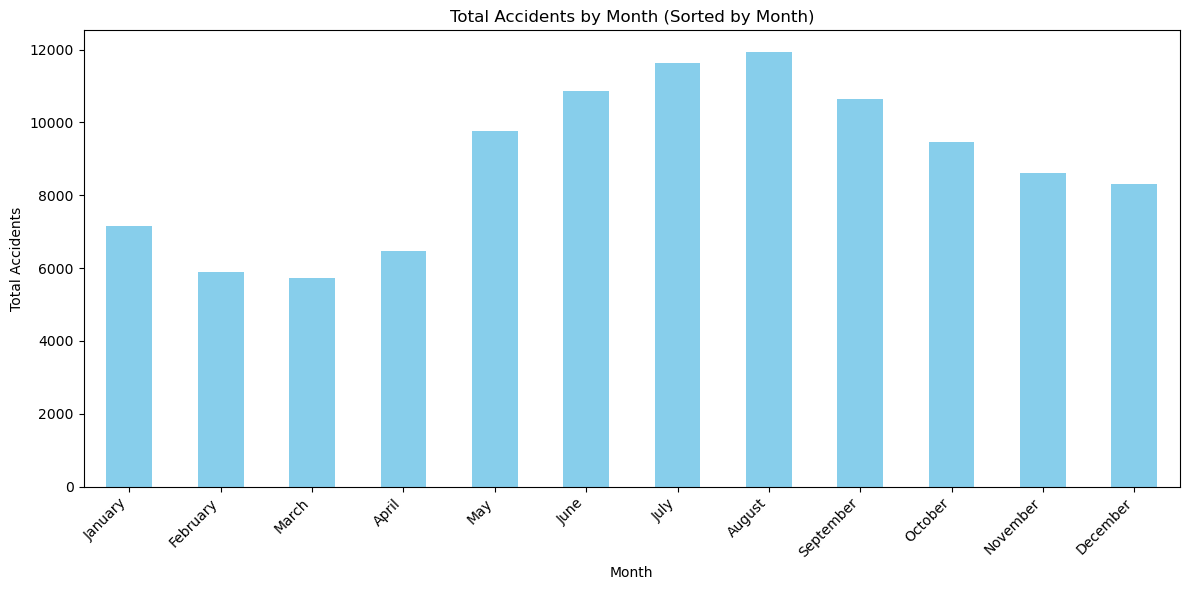

In [9]:

data = pd.read_csv(data_files[1])

# Extract the year and month
data['Year'] = data['Year_Date'].str[:4].astype(int)
data['Month'] = data['Year_Date'].str[5:].astype(int)

# Group by Month and sum
monthly_totals = data.groupby('Month')['Total'].sum()

# Sort by Month (index)
monthly_totals = monthly_totals.sort_index()  # Use sort_index() to sort by index

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace month numbers with month names in the index
monthly_totals.index = monthly_totals.index.map(month_names)

# Plotting
plt.figure(figsize=(12, 6))
monthly_totals.plot(kind='bar', color='skyblue')
plt.title('Total Accidents by Month (Sorted by Month)')
plt.xlabel('Month')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h1 style="line-height:3rem;">Analyzing the graph, we can infer that the summer spike in accidents is linked to heightened vehicle presence and a tendency towards  faster driving </h1>

# Traffic Vs Accident 

<Figure size 1400x800 with 0 Axes>

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

<BarContainer object of 19 artists>

Text(0.5, 0, 'Area')

Text(0, 0.5, 'Values')

Text(0.5, 1.0, 'Traffic, Accidents, and Scaled Ratio by Area (2022-2023) - Sorted by Ratio')

([<matplotlib.axis.XTick at 0x71027c5ac1a0>,
 [Text(0.25, 0, 'MK09 South Karelia'),
  Text(1.25, 0, 'MK06 Pirkanmaa'),
  Text(2.25, 0, 'MK17 North Ostrobothnia'),
  Text(3.25, 0, 'MK14 South Ostrobothnia'),
  Text(4.25, 0, 'MK12 North Karelia'),
  Text(5.25, 0, 'MK15 Ostrobothnia'),
  Text(6.25, 0, 'MK19 Lapland'),
  Text(7.25, 0, 'MK18 Kainuu'),
  Text(8.25, 0, 'MK02 Southwest Finland'),
  Text(9.25, 0, 'MK16 Central Ostrobothnia'),
  Text(10.25, 0, 'MK11 North Savo'),
  Text(11.25, 0, 'MK13 Central Finland'),
  Text(12.25, 0, 'MK10 South Savo'),
  Text(13.25, 0, 'MK05 Kanta-Häme'),
  Text(14.25, 0, 'MK07 Päijät-Häme'),
  Text(15.25, 0, 'MK08 Kymenlaakso'),
  Text(16.25, 0, 'MK04 Satakunta'),
  Text(17.25, 0, 'MK01 Uusimaa'),
  Text(18.25, 0, 'MA1 MAINLAND FINLAND')])

Text(0.95, 0.9, 'MA1 MAINLAND FINLAND scaled by 10')

Text(0.95, 0.85, 'Accidents scaled by 100')

Text(0.95, 0.8, 'Ratio scaled by 50')

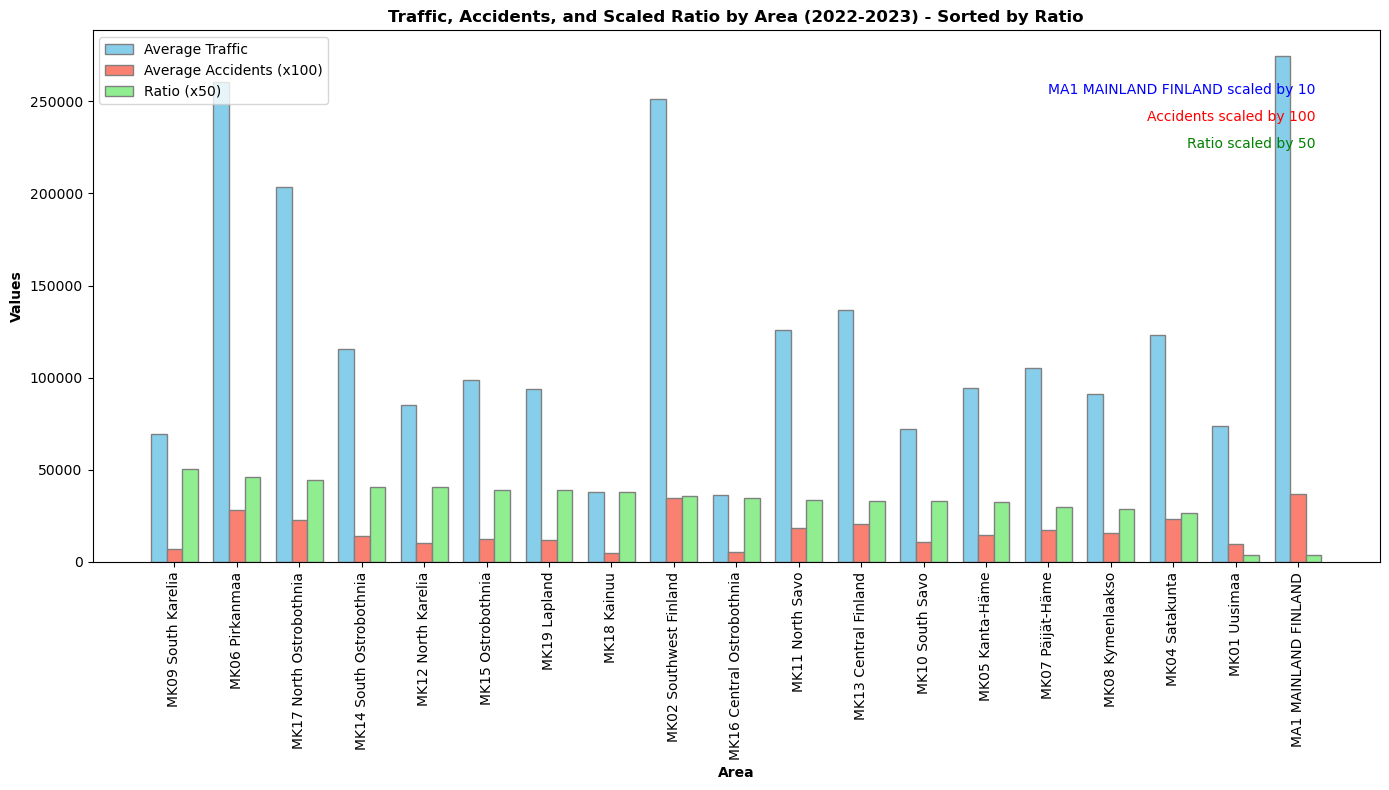

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data as a dictionary
data = {
    "Area": [
        "MA1 MAINLAND FINLAND", "MK01 Uusimaa", "MK02 Southwest Finland", "MK04 Satakunta", 
        "MK05 Kanta-Häme", "MK06 Pirkanmaa", "MK07 Päijät-Häme", "MK08 Kymenlaakso", 
        "MK09 South Karelia", "MK10 South Savo", "MK11 North Savo", "MK12 North Karelia", 
        "MK13 Central Finland", "MK14 South Ostrobothnia", "MK15 Ostrobothnia", 
        "MK16 Central Ostrobothnia", "MK17 North Ostrobothnia", "MK18 Kainuu", "MK19 Lapland"
    ],
    "2022_Number_of_Traffic": [
        2740393, 734518, 250513, 122966, 94280, 259125, 105150, 91198, 69512, 72200, 
        125915, 85498, 136849, 115219, 98331, 36559, 202749, 38192, 93442
    ],
    "2023_Number_of_Traffic": [
        2756015, 741261, 251910, 123330, 94207, 261740, 105072, 90792, 69613, 72032, 
        126193, 85351, 137206, 115661, 98828, 36535, 204065, 38108, 94583
    ],
    "2022_Number_of_Accident": [
        3812, 970, 369, 248, 144, 293, 173, 175, 80, 127, 211, 108, 221, 145, 127, 45, 216, 35, 125
    ],
    "2023_Number_of_Accident": [
        3608, 962, 329, 220, 145, 275, 179, 144, 58, 92, 162, 103, 190, 139, 125, 60, 242, 66, 117
    ]
}

# Load the data into a pandas DataFrame
df = pd.DataFrame(data)

# Calculate the average traffic and accidents for each area
df['Average Traffic'] = df[['2022_Number_of_Traffic', '2023_Number_of_Traffic']].mean(axis=1)
df['Average Accidents'] = df[['2022_Number_of_Accident', '2023_Number_of_Accident']].mean(axis=1)

# Calculate the Ratio (Traffic/Accidents)
df['Ratio'] = df['Average Traffic'] / df['Average Accidents']

# Scale down only "MA1 MAINLAND FINLAND" and "MK01 Uusimaa" to balance the plot
scale_factor = 10  # Scale down by a factor of 10
df.loc[df['Area'] == 'MA1 MAINLAND FINLAND', 'Average Traffic'] /= scale_factor
df.loc[df['Area'] == 'MA1 MAINLAND FINLAND', 'Average Accidents'] /= scale_factor
df.loc[df['Area'] == 'MA1 MAINLAND FINLAND', 'Ratio'] /= scale_factor

df.loc[df['Area'] == 'MK01 Uusimaa', 'Average Traffic'] /= scale_factor
df.loc[df['Area'] == 'MK01 Uusimaa', 'Average Accidents'] /= scale_factor
df.loc[df['Area'] == 'MK01 Uusimaa', 'Ratio'] /= scale_factor

# Scale up the Ratio values to make them visible
ratio_scaling_factor = 50  # Scale up Ratio by 400 #############################################
df['Ratio Scaled'] = df['Ratio'] * ratio_scaling_factor

# Sort the DataFrame by Ratio for better visualization
df = df.sort_values(by='Ratio', ascending=False)

# --- Three-Bar Plot for Traffic, Accidents, and Scaled Ratio ---
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
bar_width = 0.25  # Width of the bars

# Set the positions of the bars on the x-axis
r1 = np.arange(len(df['Area']))  # Positions for Traffic
r2 = [x + bar_width for x in r1]  # Positions for Accidents
r3 = [x + bar_width * 2 for x in r1]  # Positions for Ratio

# Plot Traffic
plt.bar(r1, df['Average Traffic'], color='skyblue', width=bar_width, edgecolor='grey', label='Average Traffic')

# Plot Accidents (scaled for visibility)
accident_scaling_factor = 100  # Scale accidents by 1000 #############################################
plt.bar(r2, df['Average Accidents'] * accident_scaling_factor, color='salmon', width=bar_width, edgecolor='grey', label=f'Average Accidents (x{accident_scaling_factor})')

# Plot Scaled Ratio
plt.bar(r3, df['Ratio Scaled'], color='lightgreen', width=bar_width, edgecolor='grey', label=f'Ratio (x{ratio_scaling_factor})')

# Add labels, title, and legend
plt.xlabel('Area', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Traffic, Accidents, and Scaled Ratio by Area (2022-2023) - Sorted by Ratio', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(df['Area']))], df['Area'], rotation=90)
plt.legend()

# Add annotation for scaling factors
plt.text(0.95, 0.9, f'MA1 MAINLAND FINLAND scaled by {scale_factor}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, color='blue')
plt.text(0.95, 0.85, f'Accidents scaled by {accident_scaling_factor}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, color='red')
plt.text(0.95, 0.8, f'Ratio scaled by {ratio_scaling_factor}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=10, color='green')

# Show the plot
plt.tight_layout()  # Improves plot layout
plt.show()

<h1 style="line-height:3rem;">The following plot shows MK09 South Karelia, MK06 Pirkanmaa, and MK17 North Ostrobothnia have the highest ratio in terms of Traffic and Accident  </h1>